In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()

In [3]:
dsBoston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
dfBoston = pd.DataFrame(dsBoston.data, columns = dsBoston.feature_names)
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
dfBoston['MEDV'] = dsBoston.target
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


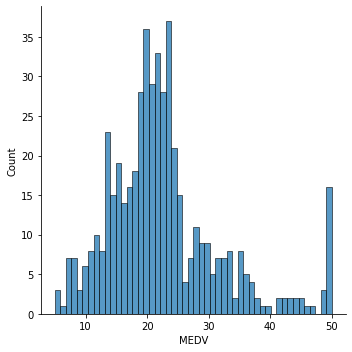

In [7]:
sns.displot(dfBoston['MEDV'], bins=50)
plt.show()

In [8]:
correlation_matrix_boston = dfBoston.corr().round(2)
correlation_matrix_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


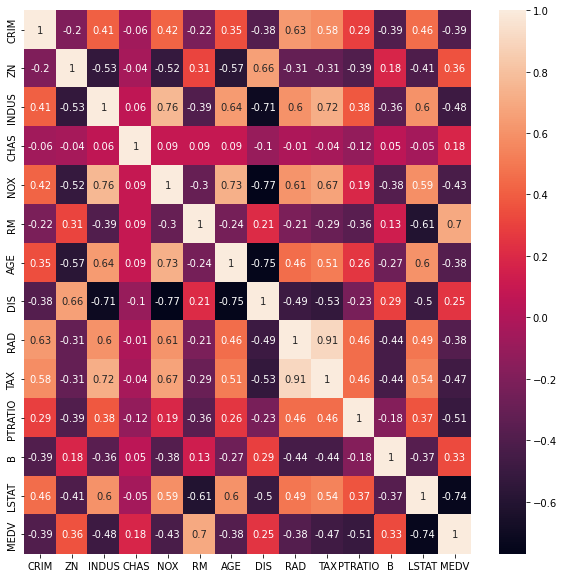

In [10]:
sns.heatmap(data=correlation_matrix_boston, annot=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

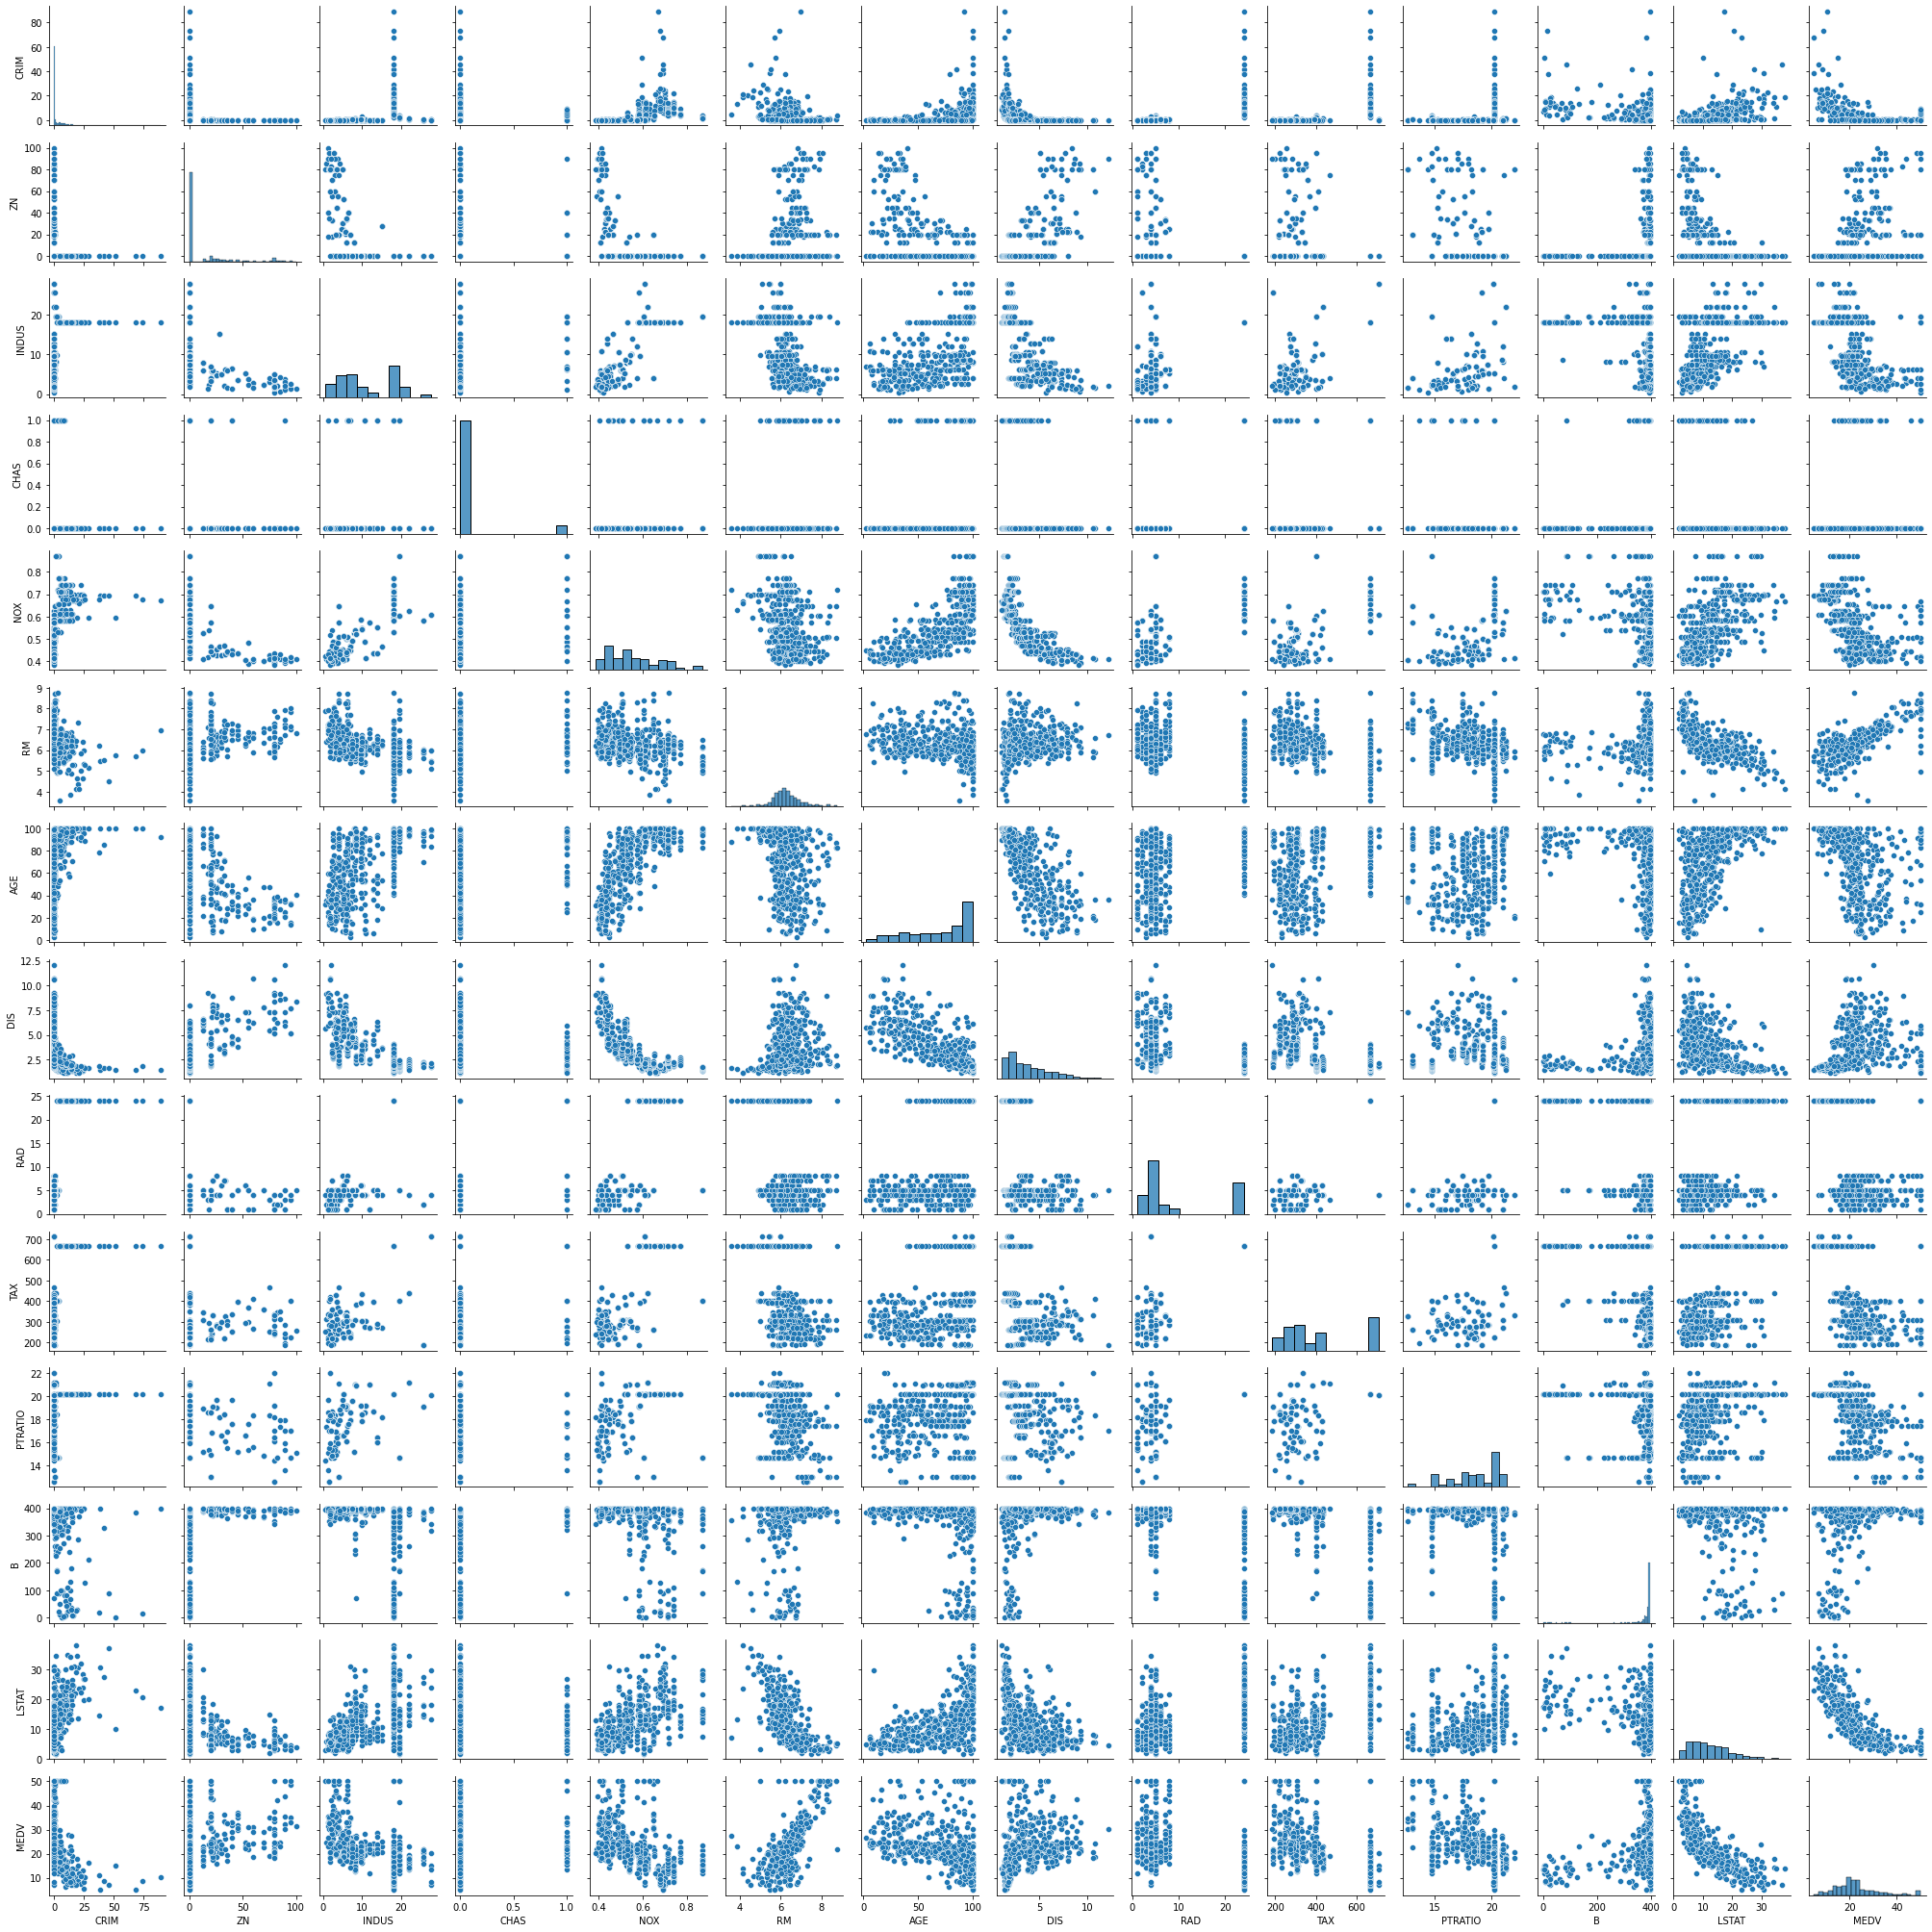

In [13]:
sns.pairplot(dfBoston, height=2)
plt.tight_layout()

In [14]:
dfModelBoston = dfBoston[['RM', 'LSTAT', 'PTRATIO']]
dfModelBoston.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [15]:
dfModelBostonPrices = dfBoston['MEDV']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dfModelBoston, dfModelBostonPrices, train_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
linear_model_boston = LinearRegression()
linear_model_boston.fit(X_train, y_train)

print('Coeficiente: ', linear_model_boston.coef_)
print('Término Independiente: ', linear_model_boston.intercept_)

Coeficiente:  [ 4.80754261 -0.47017183 -1.04876991]
Término Independiente:  17.26226984422838


In [20]:
from sklearn.metrics import r2_score
y_train_predict = linear_model_boston.predict(X_train)
r2 = r2_score(y_train, y_train_predict)
print('Performance del modelo: {}'.format(r2))

Performance del modelo: 0.6538060380614954


In [ ]:
# R2ajustado = 1 - (1-r2)/(n-(p+1)) VT/(n-1)

In [24]:
y_test_predict = linear_model_boston.predict(X_test)
r2 = r2_score(y_test, y_test_predict)
adjusted_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Performance del modelo R2: {}'.format(r2))
print('Performance del modelo R2 Ajustado: {}'.format(adjusted_r2))

Performance del modelo R2: 0.6768446259432319
Performance del modelo R2 Ajustado: 0.6744270046909369


In [25]:
predicted_data_boston = linear_model_boston.predict(dfModelBoston)
predicted_data_boston[0:5]

array([30.48422716, 25.16602602, 31.2415666 , 29.9111505 , 29.50376369])

In [26]:
dfAP = pd.DataFrame({'Actual':dfBoston['MEDV'], 'Predicción':predicted_data_boston})
dfAP.head(10)

,Actual,Predicción
0,24.0,30.484227
1,21.6,25.166026
2,34.7,31.241567
3,33.4,29.911151
4,36.2,29.503764
5,28.7,26.113176
6,22.9,24.379678
7,27.1,21.989330
8,16.5,14.319997
9,18.9,22.145515


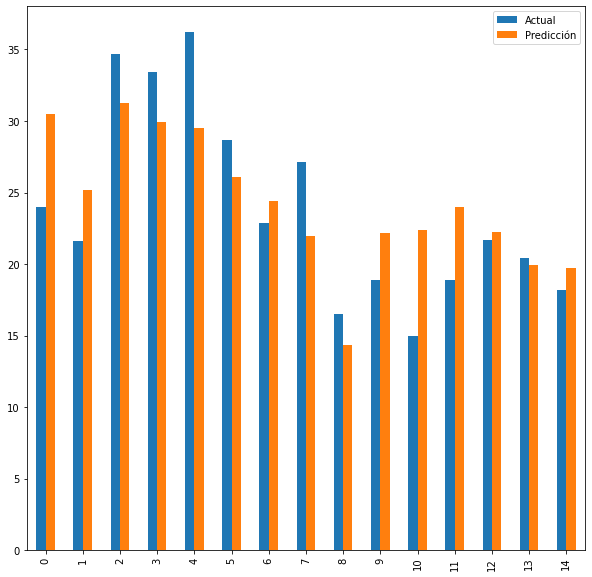

In [27]:
dfAP.head(15).plot(kind='bar')
plt.show()